In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv(r"L:\TRAFFIC - VIOLATION\traffic_violaions.csv")
df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [15]:
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [16]:
df=df.drop(['country_name','search_type'],axis=1)


In [17]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52964,10/5/2011,7:19,F,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [18]:
round(df.isnull().sum(axis=1).sort_values(ascending=False)/len(df)*100,2)

52965    0.02
12191    0.02
41514    0.02
12001    0.02
12000    0.02
         ... 
17992    0.00
17994    0.00
17995    0.00
17996    0.00
26483    0.00
Length: 52966, dtype: float64

In [20]:
data=df.isnull().any(axis=1)
data

0        False
1        False
2        False
3        False
4        False
         ...  
52961     True
52962    False
52963     True
52964    False
52965     True
Length: 52966, dtype: bool

In [22]:
index=data.index[data.values]
index


Int64Index([   25,    29,    52,   110,   124,   146,   150,   205,   226,
              281,
            ...
            52831, 52863, 52871, 52884, 52939, 52957, 52960, 52961, 52963,
            52965],
           dtype='int64', length=3626)

In [23]:
df=df.drop(index,axis=0)

In [24]:
df.isnull().sum()


stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [25]:
df['stop_date'] = pd.to_datetime(df['stop_date'], errors='coerce')


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49340 non-null  datetime64[ns]
 1   stop_time           49340 non-null  object        
 2   driver_gender       49340 non-null  object        
 3   driver_age_raw      49340 non-null  float64       
 4   driver_age          49340 non-null  float64       
 5   driver_race         49340 non-null  object        
 6   violation_raw       49340 non-null  object        
 7   violation           49340 non-null  object        
 8   search_conducted    49340 non-null  object        
 9   stop_outcome        49340 non-null  object        
 10  is_arrested         49340 non-null  object        
 11  stop_duration       49340 non-null  object        
 12  drugs_related_stop  49340 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
m

In [27]:
df.head()


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [28]:
df.columns


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

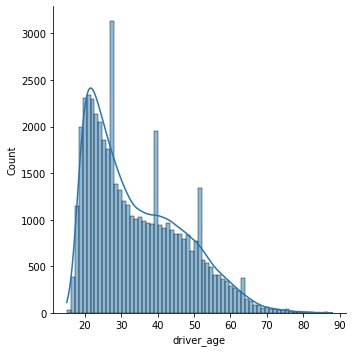

In [29]:
#Traffic-violations by age

sns.displot(df['driver_age'],kde=True)
plt.show()


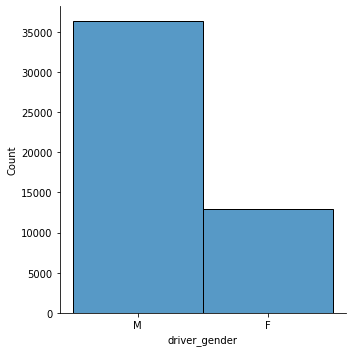

In [30]:
#Traffic violation By Male and Female
#not used get dummies an it was easier this way

sns.displot(df['driver_gender'])
plt.show()



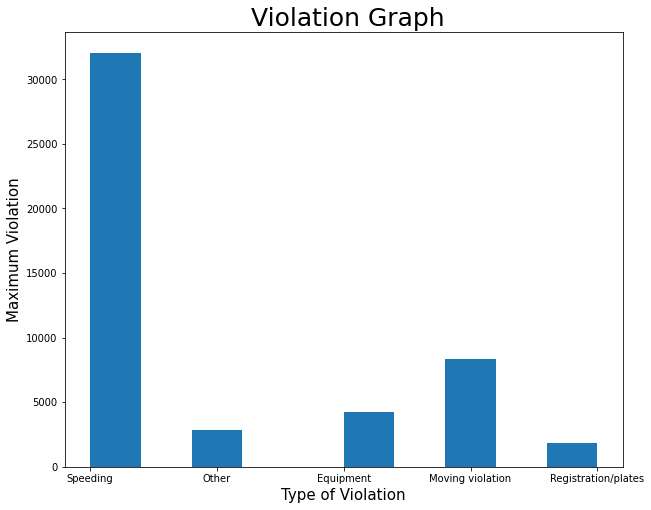

In [32]:
#Type of Violation

plt.figure(figsize=(10,8)) 
plt.hist(df['violation'])
plt.title(" Violation Graph",fontsize=25)
plt.xlabel('Type of Violation',fontsize=15)
plt.ylabel('Maximum Violation',fontsize=15)
plt.show()



In [33]:
#How many Traffic violation Occured

df['violation'].value_counts()



Speeding               32060
Moving violation        8336
Equipment               4269
Other                   2858
Registration/plates     1817
Name: violation, dtype: int64

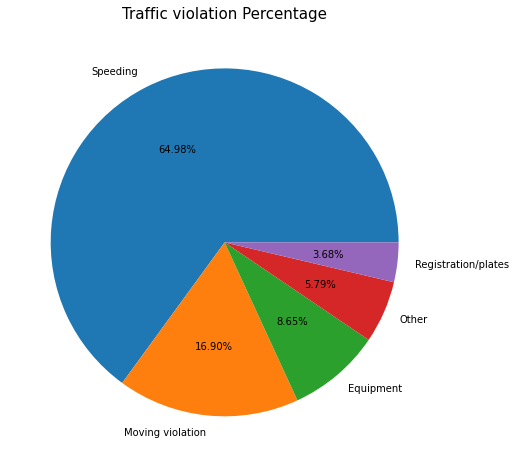

In [37]:
Violation=df['violation'].value_counts().values

plt.figure(figsize=(10,8)) 
langs = ['Speeding', 'Moving violation','Equipment','Other','Registration/plates',]
plt.pie(Violation, labels = langs,autopct='%1.2f%%')
plt.title("Traffic violation Percentage",fontsize=15)
plt.show()

In [38]:
#How Many People were Arrested

df['is_arrested'].value_counts()

arrest=df['is_arrested'].value_counts().values

arrest

array([47472,  1868], dtype=int64)

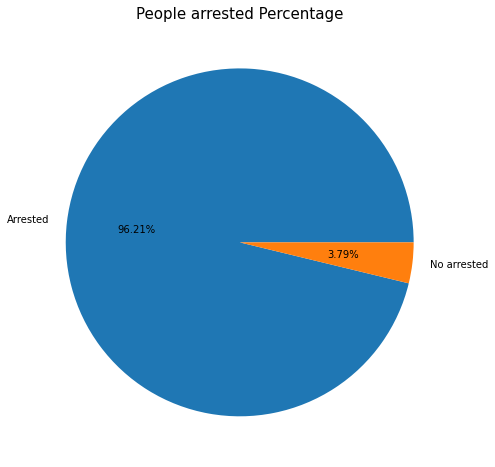

In [39]:
plt.figure(figsize=(10,8)) 
langs = ['Arrested', 'No arrested']
plt.pie(arrest, labels = langs,autopct='%1.2f%%')
plt.title("People arrested Percentage",fontsize=15)
plt.show()

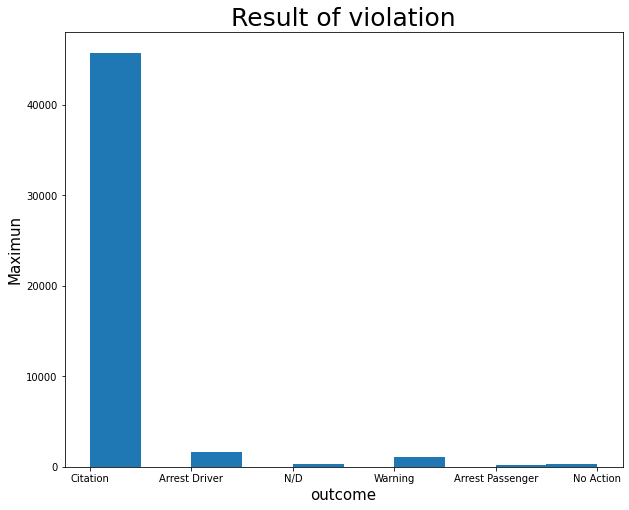

In [40]:
plt.figure(figsize=(10,8)) 
plt.hist(df['stop_outcome'])
plt.title("Result of violation",fontsize=25)
plt.xlabel('outcome',fontsize=15)
plt.ylabel('Maximun',fontsize=15)
plt.show()

In [41]:
#thank you